# Problem Statement:
The Bank Marketing data is related with direct marketing campaigns of a Portuguese banking institution.

*   
The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed. 

*   The classification goal is to predict if the client will subscribe a Term Deposit Taken (variable y).



### Predictor / Independent Variables :
1. **Age** : (numeric) 

2. **Job** : type of job (categorical: “admin”, “blue-collar”, “entrepreneur”, “housemaid”, “management”, “retired”, “self-employed”, “services”, “student”, “technician”, “unemployed”, “unknown”) 

3. **Marital Status** : marital status (categorical: “divorced”, “married”, “single”, “unknown”) 

4. **Education** : (categorical: “basic.4y”, “basic.6y”, “basic.9y”, “high.school”, “illiterate”, “professional.course”, “university.degree”, “unknown”) 

5. **Credit Default:** has credit in default? (categorical: “no”, “yes”, “unknown”). 

6. **Housing Loan** : has housing loan? (categorical: “no”, “yes”, “unknown”) 

7. **Personal Loan** : has personal loan? (categorical: “no”, “yes”, “unknown”) 

### Target / Dependent Variable :

1. **Term Deposit Taken** :  has the client subscribed a term deposit ? (binary: “1” means “Yes”, “0” means “No” )

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import copy
import numpy as np
import seaborn as sns
import pydotplus
import warnings
import operator
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn import preprocessing as preprocess
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn import metrics
from matplotlib.pyplot import gcf
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
warnings.filterwarnings('ignore')

In [0]:
df = pd.read_excel('Bank Data for case study assignment.xlsx')

In [938]:
# View the First 5 rows of DataFrame :

df.head()

,age,job,marital status,education,credit default?,housing loan?,Personal loan,y
0,30,unemployed,married,primary,no,no,no,no
1,33,services,married,secondary,no,yes,yes,no
2,35,management,single,tertiary,no,yes,no,no
3,30,management,married,tertiary,no,yes,yes,no
4,59,blue-collar,married,secondary,no,yes,no,no


In [939]:
# View the Last 5 rows of DataFrame :

df.tail()

,age,job,marital status,education,credit default?,housing loan?,Personal loan,y
1016,33,services,married,secondary,no,NaN,no,no
1017,57,self-employed,married,tertiary,yes,yes,yes,no
1018,57,technician,married,secondary,no,no,no,no
1019,28,blue-collar,married,secondary,no,no,no,no
1020,44,entrepreneur,single,tertiary,no,yes,yes,no


#Perform exploratory data analysis 

In [940]:
df.columns


Index(['age', 'job', 'marital status ', 'education', 'credit default?',
       'housing loan?', 'Personal loan', 'y'],
      dtype='object')

In [941]:
df.shape


(1021, 8)

## Individual Data Field analysis

### **Age Field - data analysis** 

In [0]:
# Binning the Data of Age to make it Categorical :

df['Age'] = pd.cut(df['age'], [10, 20, 30,40, 50, 60, 70, 80, 90], labels=['11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90'])

Age - Unique Values :

 [21-30, 31-40, 51-60, 41-50, 11-20, 61-70, 71-80, 81-90]
Categories (8, object): [11-20 < 21-30 < 31-40 < 41-50 < 51-60 < 61-70 < 71-80 < 81-90] 

Age - No of Unique Values :

 8 

Age - Frequency Count Values :

 AxesSubplot(0.125,0.125;0.775x0.755)


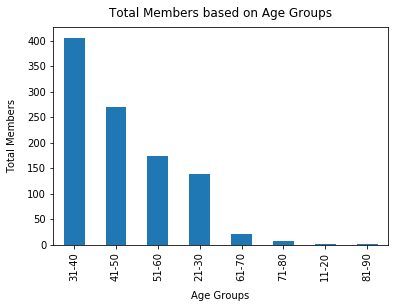

In [943]:
# Unique Age Values :

print("Age - Unique Values :\n\n",          df['Age'].unique(),'\n')
print("Age - No of Unique Values :\n\n",    df['Age'].nunique(),'\n')
# print("Age - Frequency Count Values :\n\n", data['Age'].value_counts())
print("Age - Frequency Count Values :\n\n", df['Age'].value_counts().plot(kind="bar"))
plt.xlabel("Age Groups", labelpad=10)
plt.ylabel("Total Members", labelpad=10)
plt.title("Total Members based on Age Groups", y=1.02);

### **Job Field - data analysis** 

Job - Unique Values :

 ['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired' nan
 'unknown'] 


Job - No of Unique Values :

 12 


Job - Frequency Count Values :

 AxesSubplot(0.125,0.125;0.775x0.755)


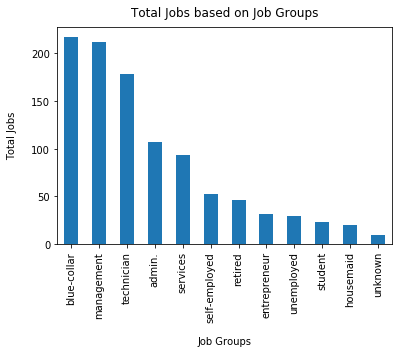

In [944]:
# Unique Job Values :

print("Job - Unique Values :\n\n",          df['job'].unique(),'\n\n')
print("Job - No of Unique Values :\n\n",    df['job'].nunique(),'\n\n')
print("Job - Frequency Count Values :\n\n", df['job'].value_counts().plot(kind="bar"))
plt.xlabel("Job Groups", labelpad=14)
plt.ylabel("Total Jobs", labelpad=14)
plt.title("Total Jobs based on Job Groups", y=1.02);

### **Marital Status Field - data analysis** 

Marital Status - Unique Values :

 ['married' 'single' 'divorced' nan] 


Marital Status - No of Unique Values :

 3 


Marital Status - Frequency Count Values :

 AxesSubplot(0.125,0.125;0.775x0.755)


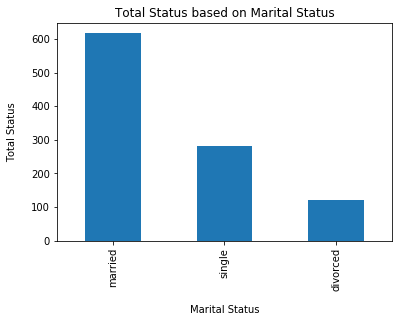

In [945]:
# Unique Marital Status Values :

print("Marital Status - Unique Values :\n\n",          df['marital status '].unique(),'\n\n')
print("Marital Status - No of Unique Values :\n\n",    df['marital status '].nunique(),'\n\n')
print("Marital Status - Frequency Count Values :\n\n", df['marital status '].value_counts().plot(kind="bar"))
plt.xlabel("Marital Status", labelpad=14)
plt.ylabel("Total Status", labelpad=14)
plt.title("Total Status based on Marital Status", y=1);

### **Education Field - data analysis** 

Education - Unique Values :

 ['primary' 'secondary' 'tertiary' 'unknown' nan] 


Education - No of Unique Values :

 4 


Education - Frequency Count Values :

 AxesSubplot(0.125,0.125;0.775x0.755)


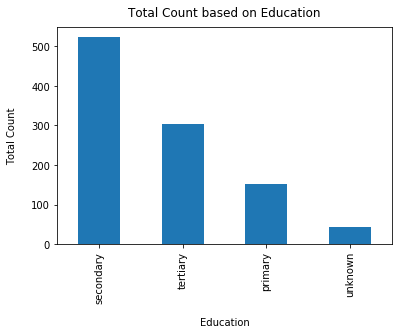

In [946]:
# Unique Education Values :

print("Education - Unique Values :\n\n",               df['education'].unique(),'\n\n')
print("Education - No of Unique Values :\n\n",         df['education'].nunique(),'\n\n')
print("Education - Frequency Count Values :\n\n", df['education'].value_counts().plot(kind="bar"))
plt.xlabel("Education", labelpad=14)
plt.ylabel("Total Count", labelpad=14)
plt.title("Total Count based on Education", y=1.02);

# NOTE : We have Inconsistent 4th Category - 'unknown'.

### **Credit Defaul Field - data analysis** 

Credit Default - Unique Values :

 ['no' 'yes' nan] 


Credit Default - No of Unique Values :

 2 


Credit Default - Frequency Count Values :

 AxesSubplot(0.125,0.125;0.775x0.755)


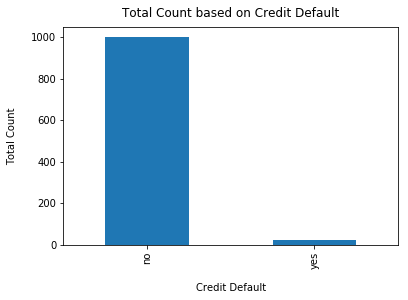

In [947]:
# Unique Credit Default Values :

print("Credit Default - Unique Values :\n\n",          df['credit default?'].unique(),'\n\n')
print("Credit Default - No of Unique Values :\n\n",    df['credit default?'].nunique(),'\n\n')
print("Credit Default - Frequency Count Values :\n\n", df['credit default?'].value_counts().plot(kind="bar"))
plt.xlabel("Credit Default", labelpad=14)
plt.ylabel("Total Count", labelpad=14)
plt.title("Total Count based on Credit Default", y=1.02);

### **Housing Loan Field - data analysis** 

Housing Loan - Unique Values :

 ['no' 'yes' nan 'xxxyy'] 


Housing Loan - No of Unique Values :

 3 


Housing Loan - Frequency Count Values :

 AxesSubplot(0.125,0.125;0.775x0.755)


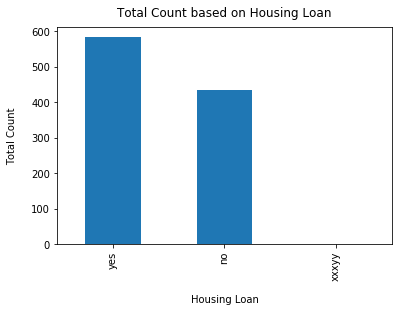

In [948]:
# Unique Housing Loan Values :

print("Housing Loan - Unique Values :\n\n",          df['housing loan?'].unique(),'\n\n')
print("Housing Loan - No of Unique Values :\n\n",    df['housing loan?'].nunique(),'\n\n')
print("Housing Loan - Frequency Count Values :\n\n", df['housing loan?'].value_counts().plot(kind="bar"))
plt.xlabel("Housing Loan", labelpad=14)
plt.ylabel("Total Count", labelpad=14)
plt.title("Total Count based on Housing Loan", y=1.02);

# NOTE : We have Inconsistent 3rd Category - 'xxxyy'.

### **Personal Loan Field - data analysis** 

Personal Loan - Unique Values :

 ['no' 'yes' nan] 


Personal Loan - No of Unique Values :

 2 


Personal Loan - Frequency Count Values :

 AxesSubplot(0.125,0.125;0.775x0.755)


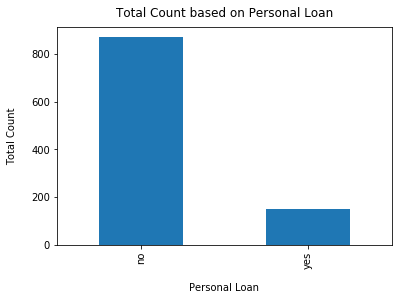

In [949]:
# Unique Personal Loan Values :

print("Personal Loan - Unique Values :\n\n",       df['Personal loan'].unique(),'\n\n')
print("Personal Loan - No of Unique Values :\n\n", df['Personal loan'].nunique(),'\n\n')
print("Personal Loan - Frequency Count Values :\n\n", df['Personal loan'].value_counts().plot(kind="bar"))
plt.xlabel("Personal Loan", labelpad=14)
plt.ylabel("Total Count", labelpad=14)
plt.title("Total Count based on Personal Loan", y=1.02);

### **Term Deposit Taken Field - data analysis** 

Term Deposit Taken - Unique Values :

 ['no' 'yes'] 


Term Deposit Taken - No of Unique Values :

 2 


Term Deposit Taken - Frequency Count Values :

 AxesSubplot(0.125,0.125;0.775x0.755)


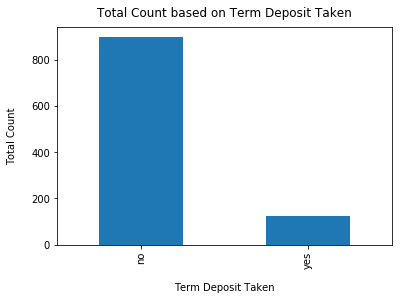

In [950]:
# Unique Term Deposit Taken Values :

print("Term Deposit Taken - Unique Values :\n\n",       df['y'].unique(),'\n\n')
print("Term Deposit Taken - No of Unique Values :\n\n", df['y'].nunique(),'\n\n')
print("Term Deposit Taken - Frequency Count Values :\n\n", df['y'].value_counts().plot(kind="bar"))
plt.xlabel("Term Deposit Taken", labelpad=14)
plt.ylabel("Total Count", labelpad=14)
plt.title("Total Count based on Term Deposit Taken", y=1.02);

## Combined data Analysis

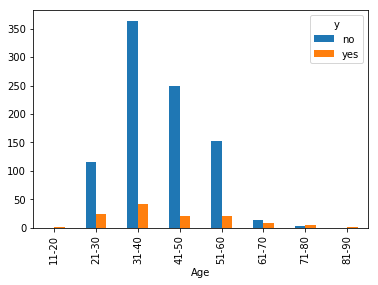

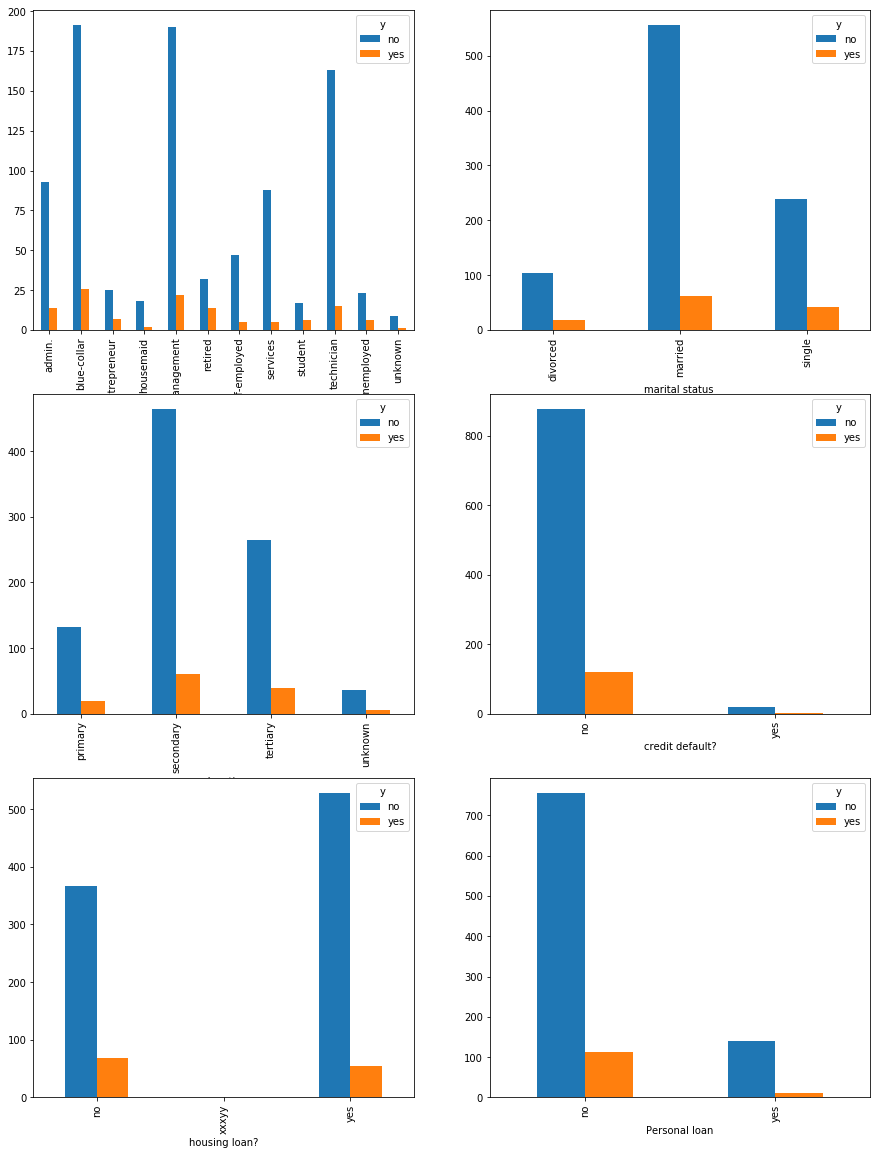

In [951]:
df.groupby(['Age'])['y'].value_counts().unstack().plot(kind='bar')
fig,ax= plt.subplots(3,2,figsize=(15,20))
df.groupby(['job'])['y'].value_counts().unstack().plot(kind='bar',ax=ax[0,0])
df.groupby(['marital status '])['y'].value_counts().unstack().plot(kind='bar',ax=ax[0,1])
df.groupby(['education'])['y'].value_counts().unstack().plot(kind='bar',ax=ax[1,0])
df.groupby(['credit default?'])['y'].value_counts().unstack().plot(kind='bar',ax=ax[1,1])
df.groupby(['housing loan?'])['y'].value_counts().unstack().plot(kind='bar',ax=ax[2,0])
df.groupby(['Personal loan'])['y'].value_counts().unstack().plot(kind='bar',ax=ax[2,1])

## Analysis Based on Data exploratory

From the combined data exporatory it is seen that below people have more chances to subscribe term deposit 
1. Age: 31 to 50
2. Job: blue-collar, technician and management
3. Marital status: married
4. Education: secondary
5. Credit default: no
6. Housing loan: yes
7. Personal loan:  no


# Preprocess the data :

### 1. Dropping NA Values:

In [952]:
#Data information before preprocessing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021 entries, 0 to 1020
Data columns (total 9 columns):
age                1021 non-null int64
job                1019 non-null object
marital status     1020 non-null object
education          1020 non-null object
credit default?    1020 non-null object
housing loan?      1019 non-null object
Personal loan      1019 non-null object
y                  1021 non-null object
Age                1021 non-null category
dtypes: category(1), int64(1), object(7)
memory usage: 65.3+ KB


In [953]:
# Data frame length before preprocessing
len(df)

1021

In [954]:
# Printing Sum of Missing Values in Each Column :
total_null = df.isnull().sum().sort_values(ascending=False)
print(total_null)

Personal loan      2
housing loan?      2
job                2
credit default?    1
education          1
marital status     1
Age                0
y                  0
age                0
dtype: int64


In [0]:
df1 = df[df.isna().any(axis=1)]

In [956]:
df1.index

Int64Index([79, 97, 108, 109, 168, 1000, 1004, 1016], dtype='int64')

In [0]:
df3 = df.drop(df1.index.tolist())

In [958]:
# Data information after preprocessing
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1013 entries, 0 to 1020
Data columns (total 9 columns):
age                1013 non-null int64
job                1013 non-null object
marital status     1013 non-null object
education          1013 non-null object
credit default?    1013 non-null object
housing loan?      1013 non-null object
Personal loan      1013 non-null object
y                  1013 non-null object
Age                1013 non-null category
dtypes: category(1), int64(1), object(7)
memory usage: 72.6+ KB


In [959]:
# Data frame length after preprocessing
len(df3)

1013

### Replacing anamoly with max occurence
In Housing Loan Field - data analysis  it is seen that there is an inappropriate value (xxxyy). Replacing with max occurence of the field

In [0]:
df['housing loan?'] = df['housing loan?'].str.replace('xxxyy','yes')

# Select Training data, test data

In [0]:
label_encode_job = preprocess.LabelEncoder()
label_encode_marital = preprocess.LabelEncoder()
label_encode_eduction = preprocess.LabelEncoder()
label_encode_credit = preprocess.LabelEncoder()
label_encode_housing = preprocess.LabelEncoder()
label_encode_person = preprocess.LabelEncoder()
label_encode_y = preprocess.LabelEncoder()

In [962]:
label_encode_job.fit(df3['job'].tolist())
label_encode_marital.fit(df3['marital status '].tolist())
label_encode_eduction.fit(df3['education'].tolist())
label_encode_credit.fit(df3['credit default?'].tolist())
label_encode_housing.fit(df3['housing loan?'].tolist())
label_encode_person.fit(df3['Personal loan'].tolist())
label_encode_y.fit(df3['y'].tolist())

LabelEncoder()

In [0]:
job_ = label_encode_job.transform(df3['job'].tolist())
marital_ = label_encode_marital.transform(df3['marital status '].tolist())
education_ = label_encode_eduction.transform(df3['education'].tolist())
credit_ = label_encode_credit.transform(df3['credit default?'].tolist())
housing_ = label_encode_housing.transform(df3['housing loan?'].tolist())
person_ = label_encode_person.transform(df3['Personal loan'].tolist())
y_ = label_encode_y.transform(df3['y'].tolist())

In [0]:
df_2 = copy.copy(df3)

In [0]:
#df_2.drop(['Age'], axis=1)
del df_2['Age']


In [966]:
df_2.head()


,age,job,marital status,education,credit default?,housing loan?,Personal loan,y
0,30,unemployed,married,primary,no,no,no,no
1,33,services,married,secondary,no,yes,yes,no
2,35,management,single,tertiary,no,yes,no,no
3,30,management,married,tertiary,no,yes,yes,no
4,59,blue-collar,married,secondary,no,yes,no,no


In [0]:
feature_cols =['age','job','matrial_status ', 'education', 'credit','housing_loan', 'personal_loan']

In [0]:
df_to_use = pd.DataFrame(data=list(zip(df_2.age.tolist(),job_,marital_,education_,credit_,housing_,person_,y_)), 
             columns=['age','job','matrial_status ', 'education', 'credit','housing_loan', 'personal_loan','y'])

In [0]:
y = df_to_use.y
X = df_to_use.drop('y', axis=1)

In [0]:
train_data, test_data, train_y, test_y = model_selection.train_test_split(X, y, test_size=0.2, random_state=13)

In [971]:
train_data[:10]

,age,job,matrial_status,education,credit,housing_loan,personal_loan
66,31,7,1,1,0,2,0
293,38,2,1,1,0,2,1
329,30,4,2,2,0,0,0
754,50,6,0,2,0,2,0
727,46,9,1,1,0,0,1
514,61,5,1,1,0,0,0
888,29,4,2,2,0,2,0
133,34,4,2,2,0,0,0
219,54,4,1,0,0,2,0
573,59,1,1,0,0,2,0


# Correlation analysis

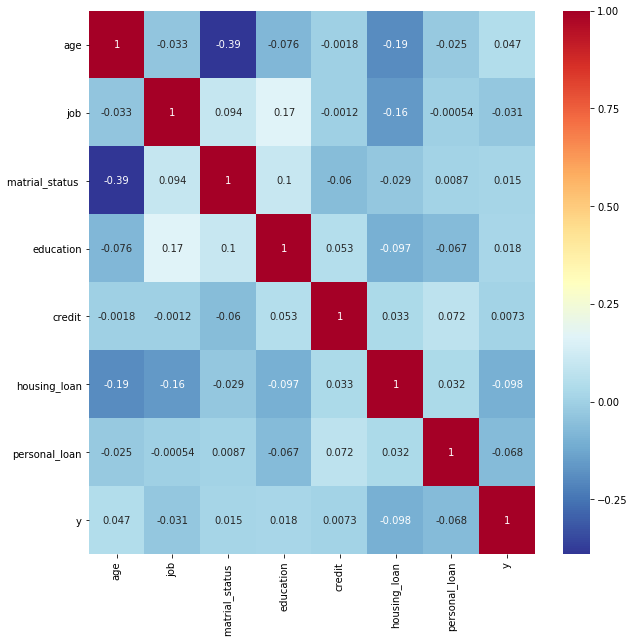

In [972]:
plt.figure(figsize=(10,10)) 
sns.heatmap(df_to_use[['age','job','matrial_status ', 'education', 'credit','housing_loan', 'personal_loan','y']].corr(),
            annot=True,cmap ='RdYlBu_r')

# Train  and test the model

**Building the classifier with criterion Entropy**

In [973]:
# Building the classifier with criterion Entropy
decision_tree_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=13)
# Training the classifier
decision_tree_classifier.fit(train_data,train_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=13, splitter='best')

In [0]:
prediction = decision_tree_classifier.predict(test_data)

In [975]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [0]:
# We are calculating accuracy on testing data
accuracy = metrics.accuracy_score(test_y,prediction)

In [977]:
print('Accuracy of the Decision tree with Entropy index : ', accuracy*100)

Accuracy of the Decision tree with Entropy index :  90.64039408866995


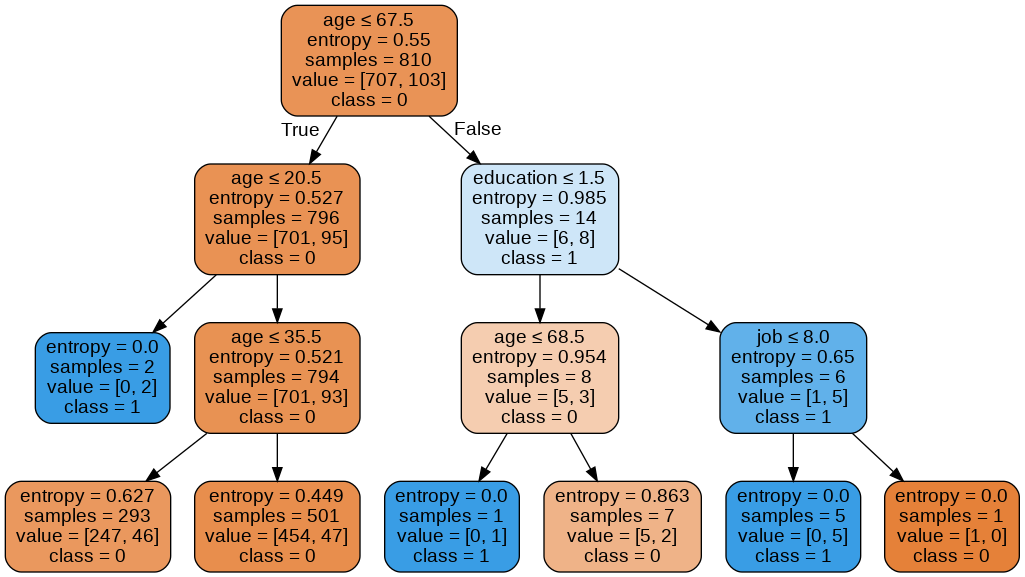

In [978]:
dot_data = StringIO()
export_graphviz(decision_tree_classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('DecisionTree_Entropy.png')
Image(graph.create_png())

**Building the classifier with criterion Gini**

In [979]:
decision_tree_classifier = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=13)
# Training the classifier
decision_tree_classifier.fit(train_data,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=13, splitter='best')

In [0]:
prediction = decision_tree_classifier.predict(test_data)

In [981]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [0]:
#calculating accuracy on testing data
accuracy = metrics.accuracy_score(test_y,prediction)

In [983]:
print('Accuracy of the Decision tree with Gini index : ', accuracy*100)

Accuracy of the Decision tree with Gini index :  90.64039408866995


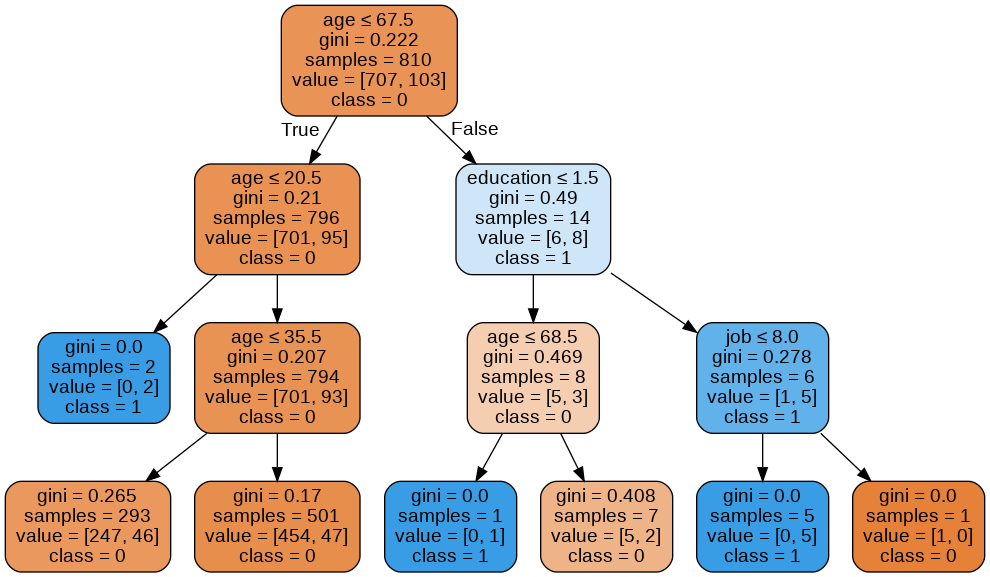

In [984]:
dot_data = StringIO()
export_graphviz(decision_tree_classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('DecisionTree_Gini.png')
Image(graph.create_png())

**Analysis**

Buiding the classifier with criterian entropy and Gini provides the same accuracy.

# Evaluate the model performance

[[184   0]
 [ 19   0]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       184
           1       0.00      0.00      0.00        19

    accuracy                           0.91       203
   macro avg       0.45      0.50      0.48       203
weighted avg       0.82      0.91      0.86       203



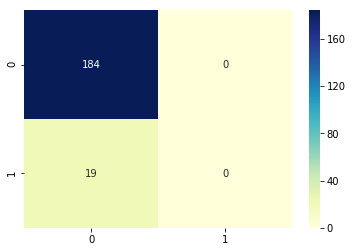

In [985]:
  plt = sns.heatmap(pd.DataFrame(metrics.confusion_matrix(test_y,prediction)), annot=True, cmap="YlGnBu" ,fmt='g')
 
  #Confusion Matrix
  confusion_matrix=metrics.confusion_matrix(test_y,prediction)
  print(confusion_matrix)
  
  #Classification Report
  classification_report=metrics.classification_report(test_y,prediction)
  print(classification_report)
  

In [0]:
# Cross validation using gini index and entropy 15 cv
# ROC and AUC curve plotting]


# Cross validation

In [0]:
score = model_selection.cross_validate(decision_tree_classifier, train_data, train_y, cv=15, return_estimator=True, n_jobs=-1)

In [0]:
test_score = []
estimator = []
for key, value in score.items():
    if key == 'test_score':
        test_score.append(value)
    if key == 'estimator':
        estimator.append(value)
    else:

      continue

In [988]:
#estimator
estimator[0][3]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=13, splitter='best')

In [0]:
max_index, max_value = max(enumerate(test_score), key=operator.itemgetter(1))

In [0]:
max_estimator = estimator[max_index]

In [991]:
max_estimator

(DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=13, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=13, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.

In [0]:
predicts = estimator[0][3].predict_proba(test_data)

In [993]:
predicts

array([[0.85064935, 0.14935065],
       [0.85064935, 0.14935065],
       [0.85064935, 0.14935065],
       [0.85064935, 0.14935065],
       [0.90531178, 0.09468822],
       [0.90531178, 0.09468822],
       [0.90531178, 0.09468822],
       [0.90531178, 0.09468822],
       [0.85064935, 0.14935065],
       [0.85064935, 0.14935065],
       [0.85064935, 0.14935065],
       [0.85064935, 0.14935065],
       [0.90531178, 0.09468822],
       [0.85064935, 0.14935065],
       [0.85064935, 0.14935065],
       [0.90531178, 0.09468822],
       [0.90531178, 0.09468822],
       [0.85064935, 0.14935065],
       [0.85064935, 0.14935065],
       [0.90531178, 0.09468822],
       [0.85064935, 0.14935065],
       [0.85064935, 0.14935065],
       [0.85064935, 0.14935065],
       [0.85064935, 0.14935065],
       [0.85064935, 0.14935065],
       [0.71428571, 0.28571429],
       [0.90531178, 0.09468822],
       [0.85064935, 0.14935065],
       [0.85064935, 0.14935065],
       [0.85064935, 0.14935065],
       [0.

AUC: 0.607


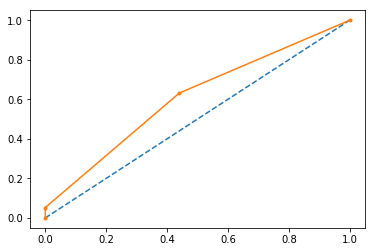

In [994]:
# keep probabilities for the positive outcome only
probs = predicts[:, 1]
# calculate AUC
auc = roc_auc_score(test_y, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(test_y, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

# Inference

**Data exploratory**
*  Provided the detailed analysis of each and every attribute of the data set using plots.
*  Found the anamoly in housing loan column with value xxxyy which is handled in data preprocessing.

**Data preprocessing**
* Dropping NA Values: From the given dataset, it is seen that 8 records have empty values. Since it is negligible (< 1%) these entries can be deleted.
*Replacing with max occurence of the field: The anamoly in housing column with value "xxxyy" replaced with maximum occurence value("yes") of the field.

**Data selection, Model creation and testing**
*   From the given data set,  80% data is used for training purpose and remaining 20% is used for testing purpose.
*   Verified the accuracy with both entropy and gini index classifier criterion. 

**Evaluate the model performance**
*  Evaluated the model performance with confusion matrix and classification report.

**Cross Validation**
* Used Cross validate function (sklearn.model_selection.cross_validate) since
1) It allows specifying multiple metrics for evaluation.
2) It returns a dict containing fit-times, score-times (and optionally training scores as well as fitted estimators) in addition to the test score.
* AUC score obtained by using cross validate function for the given data set is 0.607.


